### Detecting objects 
I am using a pre-trained neural network, YOLO (Darknet) for object detection. 
For more info about YOLO visit their webpage:
http://pjreddie.com/darknet/yolo/ 
The instruction for installing is straight forward. However, to retrieve the coordinates of the bouding box around each detected object the following routines must be run from the installation directory:
>- git fetch origin pull/27/head:write_to_csv
>- git checkout write_to_csv
>- make

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob, os, shutil,subprocess
%matplotlib inline

In [82]:
current='/Users/Mehdi/gitdev/InsightProject'
path='/Users/Mehdi/darknet'

images_dir='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-13_20160315/'
imlist=glob.glob(images_dir+"*.JPG")

In [175]:
name=images_dir+'masked/'
if os.path.isdir(name):
    shutil.rmtree(name)
os.mkdir(name) 
for i in range(len(imlist)):
    img = cv2.imread(imlist[i])
    #img = cv2.cvtColor( cv2.imread(imlist[i]), cv2.COLOR_RGB2GRAY )
    img[1744:1944,0:209,:]=0
    img[1840:1944,:,:]=0
    # create a CLAHE object (Arguments are optional). Contrast Limited Adaptive Histogram Equalization
    '''clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img[:,:,0] = clahe.apply(img[:,:,0])
    img[:,:,1] = clahe.apply(img[:,:,1])
    img[:,:,2] = clahe.apply(img[:,:,2])
    '''  
    cv2.imwrite(name+imlist[i][62:-4]+'_masked.JPG',img)

In [156]:
# Function to run the darknet network on a single image.
def rundarknet(cmd,path,current):
    os.chdir(path)
    p = subprocess.Popen(cmd, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    out, err = p.communicate('foo\nfoofoo\n')
    os.chdir(current)
#rundarknet(cmd,path,current,darknetout)
def copydark(origin,dest,imagename):
    #imagename=imagename.replace(' ','-')
    print 'Copying',imagename, ' from ', origin,' to ',dest
    
    cmd2=['cp','predictions.png', dest]
    cmd22=['cp','predictions.csv', dest]
    os.chdir(origin)
    p = subprocess.Popen(cmd2, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    out, err = p.communicate('foo\nfoofoo\n')
    p = subprocess.Popen(cmd22, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    out, err = p.communicate('foo\nfoofoo\n')
    os.chdir(dest)
    cmd3=['mv','predictions.png',imagename+'.png']
    cmd4=['mv','predictions.csv',imagename+'.csv']
    p = subprocess.Popen(cmd3, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    out, err = p.communicate('foo\nfoofoo\n')
    p = subprocess.Popen(cmd4, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    out, err = p.communicate('foo\nfoofoo\n')
    os.chdir(current)

#Running the pre-trained Darknet network to extract and classify objects. The classification works for people. 
#However for animals it is completely wrong! Because this step is taking a long time ~ 1 hour or less I am changing the mode to Markdown.

darknetout=images_dir+'darknetout/'
if os.path.isdir(darknetout):
    shutil.rmtree(darknetout)
os.mkdir(darknetout) 

for i in range(len(imlist)):
    imagename=name+imlist[i][62:-4]+'_masked.JPG'
    #command=['mv',imagename,imagename.replace(' ', '-')]
    #p = subprocess.Popen(command, stdout=subprocess.PIPE,stderr=subprocess.PIPE,stdin=subprocess.PIPE)
    #out, err = p.communicate('foo\nfoofoo\n')
    cmd = ['./darknet', 'detect', 'cfg/yolo.cfg', 'yolo.weights', imagename,'-thresh', '0.1']
    rundarknet(cmd,path,current)
    copydark(path,darknetout,imlist[i][62:-4])

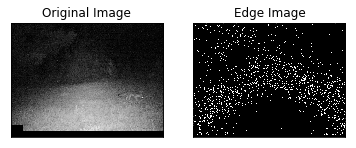

In [152]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()